# Supplemental Material: Example code
"Beyond the ABCDs: A projective geometry treatment of paraxial ray tracing using homogeneous coordinates"
Theodore A. Corcovilos (c) 2023, accepted for publication in *American Journal of Physics* and also available at [arXiv:2205.09746](https://arxiv.org/abs/2205.09746).

All of the examples in the manuscript are worked here in [python](http://python.org) using the symbolic algebra library [_sympy_](http://www.sympy.org/).  The end section contains additional examples that were omitted from the final version of the paper.

This python script is a [Jupyter notebook](http://jupyter.org/) in the "percent" archival notebook format, but it is best viewed by first converting into the Jupyter notebook `.ipynb` standard format using [`jupytext`](https://jupytext.readthedocs.io).

```
jupytext --to ipynb worked-examples.py
```

_Required packages: sympy_

## Table of Contents
* [Definitions of rays and points](#Definitions-of-rays-and-points)
* [Definitions of ray transfer matrices](#Definitions-of-ray-transfer-matrices)
* [Definition of matrix adjugate](#Definition-of-matrix-adjugate)
* [Coordinate transformations](#Coordinate-transformations)
  * [Coordinate transformations of points](#Coordinate-transformations-of-points)
  * [Other definitions of the rotation operator](#Other-definitions-of-rotation)
* [Examples from the main text](#Examples)
  * [Example 4.1](#Example-4.1)
  * [Example 5.1](#Example-5.1)
  * [Example point transfer matrices from Section 6](#Example-point-transfer-matrices)
  * [Example 7.2](#Example-7.2)
  * [Example 7.3](#Example-7.3)
  * [Example 7.4](#Example-7.4)
* [Additional examples](#Other-examples)
  * [Path-folding mirrors](#Folding-mirrors)
  * [Thick lens](#Example:-thick-lens)
  * [Right-angle prism](#Example:-Right-angle-prism)

In [1]:
# set up the python libraries
from sympy import *
init_printing()

In [2]:
# define some variable names
A, B, C, D, F, G = symbols("A, B, C, D, F, G", real=True)
h, m, x, y, a, b, c = symbols("h, m, x, y, a, b, c", real=True)
d, f, u, v = symbols("d, f, u, v",real=True)
n1, n2, R = symbols("n1, n2, R", real=True)

## Definitions of rays and points
From Section 3 and Section 6

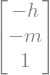

In [3]:
# left-to-right ray
ray = lambda h, m: Matrix([[-h],[-m],[1]])
ray(h,m)

In [4]:
# point
point = lambda x, y: Matrix([[1],[x],[y]])
point(x,y)

In [5]:
# ideal points represent pure directions or points on the horizon
idealpoint = lambda a, b: Matrix([[0],[a],[b]])
idealpoint(a,b)

In [6]:
# normalize point or ideal point
def normalize(p):
    if p[0,0] == 0: # "ideal" points normalize to direction cosines
        return p/sqrt(p[1,0]**2 + p[2,0]**2)
    else: # real points
        return p/p[0,0]

In [7]:
normalize(Matrix([[x],[1],[0]]))

In [8]:
normalize(Matrix([[0],[3],[4]]))

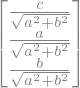

In [9]:
# normalize ray
# this makes the a and b coefficients the direction cosines and c the distance of the ray from the origin
def normalize_ray(r):
    return r/sqrt(r[1,0]**2 + r[2,0]**2)
normalize_ray(Matrix([[c],[a],[b]]))

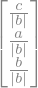

In [10]:
# standardize ray
# puts the ray into point-slope form, like the ray defined at the top of this section
def standardize_ray(r):
    return r/abs(r[2,0]) # using absolute value to preserve orientation
standardize_ray(Matrix([[c],[a],[b]]))

## Definitions of ray transfer matrices
From Section 3 and Table 1

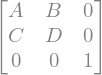

In [11]:
# Standard ABCD matrix
M = Matrix([[A, B, 0],[C, D, 0],[0,0,1]])
M

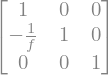

In [12]:
# thin lens
Mlens = lambda f: Matrix([[1, 0, 0],[-1/f,1,0],[0,0,1]])
Mlens(f)

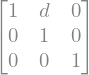

In [13]:
# propagation
Mprop = lambda d: Matrix([[1,d,0],[0,1,0],[0,0,1]])
Mprop(d)

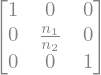

In [14]:
# plane refraction
Msnell = lambda n1, n2: Matrix([[1,0,0],[0,n1/n2,0],[0,0,1]])
Msnell(n1,n2)

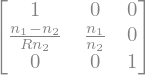

In [15]:
# spherical refraction (R>0 for convex)
Msphr = lambda n1, n2, R: Matrix([[1,0,0],[(n1-n2)/R/n2, n1/n2, 0],[0,0,1]])
Msphr(n1,n2,R)

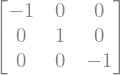

In [16]:
# plane mirror
Mmirror = Matrix([[-1,0,0],[0,1,0],[0,0,-1]])
Mmirror

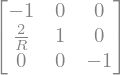

In [17]:
# spherical mirror (R>0 is convex)
Msphm = lambda R: Matrix([[-1, 0, 0],[2/R,1,0],[0,0,-1]])
Msphm(R)

## Definition of matrix adjugate
From Section 6 and the Supplemental Materials

In [18]:
# matrix adjugate (this will fail in the unphysical case det(x)=0 )
# TODO handle exceptional case when det(x)=0 by performing cofactor expansion
adj = lambda x: x.det()*(x.inv().T)

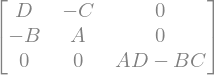

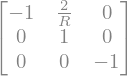

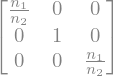

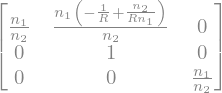

In [19]:
# Some examples: general ABCD, spherical mirror, refracting plane surface, refracting spherical surface
for thisM in [M,Msphm(R),Msnell(n1,n2),Msphr(n1,n2,R)]:
    display(adj(thisM))

## Coordinate transformations
Section 4

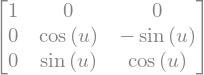

In [20]:
# Rotation of a ray
Rot = lambda u: Matrix([[1,0,0],[0,cos(u),-sin(u)],[0,sin(u),cos(u)]])
Rot(u)

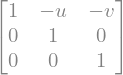

In [21]:
# Translation of a ray
T = lambda u, v: Matrix([[1,-u,-v],[0,1,0],[0,0,1]])
T(u,v)

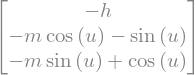

In [22]:
# Check: Rotate a ray by angle u
Rot(u)*ray(h,m)

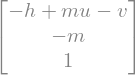

In [23]:
# Check: Translate a ray by displacement (u, v)
T(u,v)*ray(h,m)

### Coordinate transformations of points

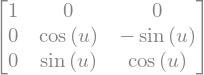

In [24]:
# Rotation operator for points
simplify(adj(Rot(u)))

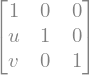

In [25]:
# Translation operator for points
simplify(adj(T(u,v)))

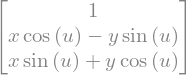

In [26]:
# Check: rotate a point
simplify(adj(Rot(u)))*point(x,y)

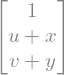

In [27]:
# Check: translate a point
simplify(adj(T(u,v)))*point(x,y)

### Other definitions of rotation
Other authors (e.g. Gerrard and J. M. Burch, _Introduction to matrix methods in optics_ (Dover, New York, 1994), 355 pp., ISBN:
978-0-486-68044-6, and those that follow Gerrard) define a different rotation matrix with the caveat that it only works for small rotation angles.  Let's look at this matrix to see what it does to our rays and points.

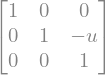

In [28]:
#The rotation matrix used in Gerrard
R_G = lambda u: Matrix([[1,0,0],[0,1,-u],[0,0,1]])
R_G(u)

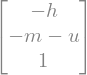

In [29]:
# Gerrards "rotation" on a ray
R_G(u)*ray(h,m)

We see that Gerrard's operator increases the slope of a ray by an amount _u_, but does not change the _y_-intercept of the ray.  This isn't really a rotation.  Let's look at a point to get a better picture:

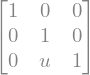

In [30]:
# Point operator for Gerrards "rotation"
simplify(adj(R_G(u)))

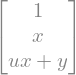

In [31]:
# Gerrards "rotation" on a point
simplify(adj(R_G(u)))*point(x,y)

We see that Gerrard's operator causes a vertical shift of size that depends on the _x_ position.  Check for example, the four corners of a square.  This transforms into a parallelogram.  In other words, the operator is a _shear_.

## Examples
These are the examples given in the main text, showing how to use the definitions above.

### Example 4.1
Tilted window

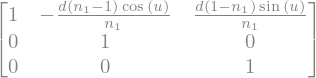

In [32]:
M4p1 = simplify(Rot(u)*T(d,0)*Msnell(n1,1)*(T(d,0).inv())*Msnell(1,n1)*(Rot(u).inv()))
M4p1

Whenever we have refraction, we have to confine our calculation to rays close to the (local) optical axis.  This is because we're using a linear approximation to Snell's Law. In the tilted window example, we have to keep the tilt angle small.  The expressions become clearer if we do a linear approximation to our matrix elements.

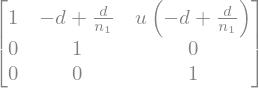

In [33]:
# small u approximation
M4p1linear = M4p1.applyfunc(lambda a: series(a, x=u, x0=0, n=2).removeO())
M4p1linear

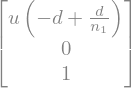

In [34]:
# The incoming ray (along the _x_-axis) becomes
M4p1linear*ray(0,0)

In [35]:
up = symbols("up", real=True) # u prime

The exact solution to the tilted window is shown in Pedrotti, problem 2-8.  The ray shifts vertically by an amount

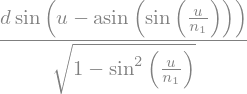

In [36]:
ytest = (d*sin(u-up)/cos(up)).subs(up, asin(sin(u/n1)))
ytest

We need to linearize this to compare with our solution.

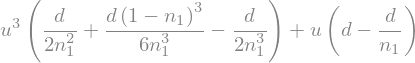

In [37]:
# approximate arcsin with 3rd-order Taylor series, then get the series expansion for ytest
(d*sin(u-up)/cos(up)).subs(up, (sin(u/n1))+(sin(u/n1))**3/6).series(x=u,x0=0,n=4).removeO()

Our solution is equal up to first order in the tilt angle _u_.

### Example 5.1
Retroreflector

Two mirrors separated by an angle _u_, with intersection at the origin.  We'll consider an incoming ray parallel to the incoming optical axis and below it by a distance _h_.

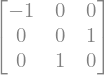

In [38]:
# First mirror
M1 = simplify(Rot(u/2)*Mmirror*Rot(-u/2))
M1.subs(u,pi/2)

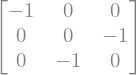

In [39]:
# Second mirror
M2 = simplify(M1.subs(u,-u))
M2.subs(u,pi/2)

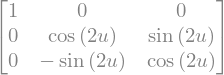

In [40]:
# Both mirrors (note that order matters)
simplify(M2*M1)

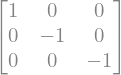

In [41]:
# right-angle case
Mra=simplify((M2*M1).subs(u,pi/2)) 
Mra

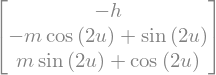

In [42]:
# The effect on a ray
simplify(M2*M1)*ray(h,m)

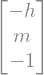

In [43]:
# Check the right-angle case
_.subs(u,pi/2)

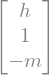

In [44]:
# after the first reflection (right angle case)
M1.subs(u,pi/2)*ray(h,m)

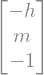

In [45]:
# after the second reflection (right angle case)
# This should agree with two lines above.
(M2*M1).subs(u,pi/2)*ray(h,m)

### Example point transfer matrices
From Section 6

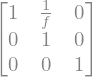

In [46]:
# This lens point transfer matrix
adj(Mlens(f))

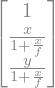

In [47]:
# image point through thin lens.  We should get the Gaussian image equation as our result
normalize(adj(Mlens(f))*point(x,y))

### Example 7.2
Imaging a distant object

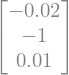

In [48]:
adj(Mlens(50.))*Matrix([[0],[-1],[0.01]])

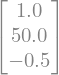

In [49]:
normalize(_)

### Example 7.3
Analysis of a compound lens

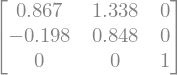

In [50]:
# given system RTM
M7p3 = Matrix([[0.867,1.338,0],[-0.198,0.848,0],[0,0,1]])
M7p3

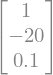

In [51]:
# Original Object point
O7p3 = point(-20,0.1)
O7p3

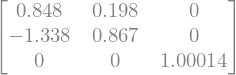

In [52]:
# system PTM
adj(M7p3)

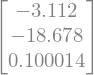

In [53]:
# image point
adj(M7p3)*O7p3

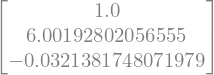

In [54]:
# normalized image point
normalize(_)

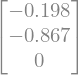

In [55]:
# Back Focal Point of the lens
adj(M7p3)*Matrix([[0],[-1],[0]])

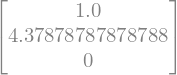

In [56]:
normalize(_)

### Example 7.4
Misaligned thin lens

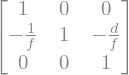

In [57]:
# RTM for a translated lens
M7p4a = T(0,d)*Mlens(f)*(T(0,d).inv())
M7p4a

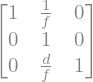

In [58]:
# PTM for a translated lens
adj(M7p4a)

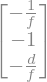

In [59]:
# Imaging the ideal point on the optical axis to find the back focal point of the lens
adj(M7p4a)*Matrix([[0],[-1],[0]])

In [60]:
normalize(_)

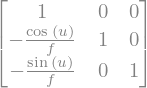

In [61]:
# RTM of the tilted lens
M7p4b = simplify(Rot(u)*Mlens(f)*(Rot(u).inv()))
M7p4b

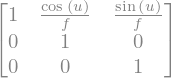

In [62]:
# PTM of the tilted lens
adj(M7p4b)

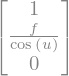

In [63]:
# Finding the back focal point of the tilted lens
normalize(adj(M7p4b)*Matrix([[0],[-1],[0]]))

## Other examples
These are examples not in the paper, but that readers may still find interesting.

### Folding mirrors
A common setup in a laser lab is a pair of plane mirrors arranged to route the beam in a Z shape.  This provides the necessary degrees of freedom to adjust both the pointing and lateral position of the beam, for example, to pass the beam through two sequential pinholes.

Here is our problem statement:
> A laser enters along the _x_-axis from the left.  We use two plane mirrors with their surfaces centered at coordinates $(1,0)$ and $(0,\sqrt{4/3})$ to steer the beam through a pair of pinholes located at coordinates $(1,\sqrt{3})$ and $(3,\sqrt{3})$.
> What are the orientations of the two mirrors?  If the mirrors are initially placed with their reflective surfaces facing in the -_x_-direction, how far must we rotated them to shoot the beam through both pinholes?
>

We'll demonstrate this with a pair of mirrors tilted at unknown angles relative to the axis, and then solve for the angles.

* Mirror 1: located at (1,0), tilted by $\theta_1$ radians
* Mirror 2: located at (0,sqrt(3)), tilted by $\theta_2+\pi$ radians

The incoming beam will be along the optical axis, coming from the left.  The outgoing beam will be at a height of $\sqrt{3}$ and slope of zero.  From geometry we know that the solution should be $\theta_1 = \theta_2 = -\pi/6$, but let's work it out.

![fig/beam-steering.svg](fig/beam-steering.svg)

In [64]:
θ1, θ2 = symbols("θ_1, θ_2", real=True)

In [65]:
# Mirror 1
FM1 = simplify(T(1,0)*Rot(θ1)*Mmirror*Rot(-θ1)*T(-1,0))
FM1

⎡          2                ⎤
⎢-1  -2⋅cos (θ₁)  -sin(2⋅θ₁)⎥
⎢                           ⎥
⎢0    cos(2⋅θ₁)   sin(2⋅θ₁) ⎥
⎢                           ⎥
⎣0    sin(2⋅θ₁)   -cos(2⋅θ₁)⎦

In [66]:
# effect of mirror 1 on the beam
FM1*ray(0,0)

⎡-sin(2⋅θ₁)⎤
⎢          ⎥
⎢sin(2⋅θ₁) ⎥
⎢          ⎥
⎣-cos(2⋅θ₁)⎦

In [67]:
# Mirror2
FM2 = simplify(T(0,sqrt(3))*Rot(θ2+pi)*Mmirror*Rot(-θ2+pi)*T(0,-sqrt(3)))
FM2

⎡-1  -√3⋅sin(2⋅θ₂)  √3⋅(cos(2⋅θ₂) - 1)⎤
⎢                                     ⎥
⎢0     cos(2⋅θ₂)        sin(2⋅θ₂)     ⎥
⎢                                     ⎥
⎣0     sin(2⋅θ₂)        -cos(2⋅θ₂)    ⎦

In [68]:
# The combination is just a translation of the beam up by $\sqrt{3}/2$
FM2*FM1

⎡                                                                2                                                    
⎢1  √3⋅(cos(2⋅θ₂) - 1)⋅sin(2⋅θ₁) - √3⋅sin(2⋅θ₂)⋅cos(2⋅θ₁) + 2⋅cos (θ₁)  -√3⋅(cos(2⋅θ₂) - 1)⋅cos(2⋅θ₁) - √3⋅sin(2⋅θ₁)⋅s
⎢                                                                                                                     
⎢0              sin(2⋅θ₁)⋅sin(2⋅θ₂) + cos(2⋅θ₁)⋅cos(2⋅θ₂)                           sin(2⋅θ₁)⋅cos(2⋅θ₂) - sin(2⋅θ₂)⋅co
⎢                                                                                                                     
⎣0              -sin(2⋅θ₁)⋅cos(2⋅θ₂) + sin(2⋅θ₂)⋅cos(2⋅θ₁)                          sin(2⋅θ₁)⋅sin(2⋅θ₂) + cos(2⋅θ₁)⋅co

                    ⎤
in(2⋅θ₂) + sin(2⋅θ₁)⎥
                    ⎥
s(2⋅θ₁)             ⎥
                    ⎥
s(2⋅θ₂)             ⎦

In [69]:
# simplify the expression above
simplify(FM2*FM1)

⎡1  -√3⋅sin(2⋅θ₁) + √3⋅sin(2⋅θ₁ - 2⋅θ₂) + cos(2⋅θ₁) + 1  sin(2⋅θ₁) + √3⋅cos(2⋅θ₁) - √3⋅cos(2⋅θ₁ - 2⋅θ₂)⎤
⎢                                                                                                      ⎥
⎢0                   cos(2⋅θ₁ - 2⋅θ₂)                                   sin(2⋅θ₁ - 2⋅θ₂)               ⎥
⎢                                                                                                      ⎥
⎣0                   -sin(2⋅θ₁ - 2⋅θ₂)                                  cos(2⋅θ₁ - 2⋅θ₂)               ⎦

In [70]:
# acting on the ray
simplify(FM2*FM1*ray(0,0))

⎡sin(2⋅θ₁) + √3⋅cos(2⋅θ₁) - √3⋅cos(2⋅θ₁ - 2⋅θ₂)⎤
⎢                                              ⎥
⎢               sin(2⋅θ₁ - 2⋅θ₂)               ⎥
⎢                                              ⎥
⎣               cos(2⋅θ₁ - 2⋅θ₂)               ⎦

In [71]:
output_ray=simplify(_/_[2,0])
output_ray

⎡sin(2⋅θ₁) + √3⋅cos(2⋅θ₁) - √3⋅cos(2⋅θ₁ - 2⋅θ₂)⎤
⎢──────────────────────────────────────────────⎥
⎢               cos(2⋅θ₁ - 2⋅θ₂)               ⎥
⎢                                              ⎥
⎢               tan(2⋅θ₁ - 2⋅θ₂)               ⎥
⎢                                              ⎥
⎣                      1                       ⎦

This has to match our outgoing ray:

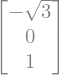

In [72]:
target_ray=ray(sqrt(3),0)
target_ray

_Undocumented trick:_ We can also get the target ray by taking the vector cross product of the two pinhole locations expressed in our homogeneous vector format. (Apologies for the ugly code - _sympy_ does not make this easy for us.)  The converse trick also works: the cross product of two ray vectors is the point where they intersect (which may be an ideal point).

In [73]:
# import vector algebra and define a vector coordinate system
from sympy.vector import cross, matrix_to_vector, CoordSys3D

coord = CoordSys3D('coord')

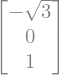

In [74]:
# the target ray calculated via the cross product trick:
standardize_ray(cross(matrix_to_vector(point(1,sqrt(3)),coord),matrix_to_vector(point(3,sqrt(3)),coord)).to_matrix(coord))

Solve for the values of $\theta_1$ and $\theta_2$ by setting each row of the rays equal to each other.

In [75]:
solve([output_ray[1,0] - target_ray[1,0],output_ray[0,0] - target_ray[0,0]], [θ1,θ2], dict=True)

In [76]:
# the angle in decimal form for comparison below
N(-pi/6)

Now let's modify the problem to make the solution harder to work by hand using geometry.  Let's say we need to move the first mirror up by 0.1 (perhaps because of the way it is mounted).  The new RTM for mirror 1 is

In [77]:
FM1new = simplify(T(1,0.1)*Rot(θ1)*Mmirror*Rot(-θ1)*T(-1,-0.1))
FM1new

⎡-1  -0.1⋅sin(2⋅θ₁) - cos(2⋅θ₁) - 1.0  -sin(2⋅θ₁) + 0.1⋅cos(2⋅θ₁) - 0.1⎤
⎢                                                                      ⎥
⎢0              cos(2⋅θ₁)                         sin(2⋅θ₁)            ⎥
⎢                                                                      ⎥
⎣0              sin(2⋅θ₁)                         -cos(2⋅θ₁)           ⎦

The solution proceeds the same as before...

In [78]:
new_output_ray = FM2*FM1new*ray(0,0)
new_output_ray = simplify(new_output_ray/new_output_ray[2,0])
new_output_ray

⎡1.0⋅sin(2⋅θ₁) - 0.1⋅cos(2⋅θ₁) + 1.0⋅√3⋅cos(2⋅θ₁) - √3⋅cos(2⋅θ₁ - 2⋅θ₂) + 0.1⎤
⎢────────────────────────────────────────────────────────────────────────────⎥
⎢                              cos(2⋅θ₁ - 2⋅θ₂)                              ⎥
⎢                                                                            ⎥
⎢                              tan(2⋅θ₁ - 2⋅θ₂)                              ⎥
⎢                                                                            ⎥
⎣                                     1                                      ⎦

In [79]:
solve([new_output_ray[1,0] - target_ray[1,0],new_output_ray[0,0] - target_ray[0,0]], [θ1,θ2], dict=True)

We see that the angles have slightly changed, but the mirrors are still parallel to each other.  The second solution can be discarded because it would have the rays hitting the back surface of the mirrors, which is not physical.

### Example: thick lens
Let's locate the focal points of a thick plano-convex lens, with the curved side first, vertex at the origin, and reseting the coordinate axes at the end.

* Radius of curvature: _R_ = 50 mm
* Thickness: _d_ = 5 mm
* Index of refraction: _n_ = 3/2

In [80]:
R = 50
d = 5
n = Rational(3,2) # the fraction 3/2

The order of operators (from right to left) is
* Spherical surface (convex)
* Thickness of the lens
* Planar surface
* Reset coordinates back to the original place

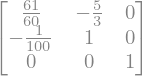

In [81]:
# RTM for the thick lens
Mpx=T(d,0)*Msnell(n,1)*T(-d,0)*Msphr(1,n,R)
Mpx

The effective focal length is -1/B, just like the thin lens. (Think of this as the conversion factor between the height of an incoming horizontal ray and the slope of the outgoing ray.)

In [82]:
EFL = -1/Mpx[1,0]
EFL

We can find the back focal point by imaging an ideal point in the -x direction. (Note that this will be measured from the origin, i.e. the front of the lens).

In [83]:
BFP=N(normalize(adj(Mpx)*Matrix([[0],[-1],[0]])))[1]
BFP

We can find the front focal point by reversing the system and repeating the above.  The vertex of the convex side will still be at the origin after the inversion.

To reverse the system, we need to invert the system matrix and bring in the ray from the left side.

In [84]:
FFP=N(normalize(adj(Mpx).inv()*Matrix([[0],[-1],[0]])))[1]
FFP

The principal planes are a distance EFL from the focal points.

In [85]:
# Front principle plane (should be at the vertex of the concave side)
FPP = FFP+EFL
FPP

In [86]:
# Back principle plane (should be approximately 1/3 of the lens thickness for a glass lens)
BPP = BFP-EFL
BPP

These results agree with the known properties of a glass plano-convex lens.  The principal planes are at the vertex of the convex surface and about 1/3 of the thickness of the lens from the vertex.

### Example: Right-angle prism
We'll modify the right-angle mirror retroreflector example above to make a right-angle prism retroreflector.
* Index of refraction: _n_
* Thickness (from hypotenuse to right-angle): _d_

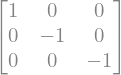

In [87]:
# The right-angle mirror matrix from Example 5.1
Mra

In [88]:
d, n = symbols('d, n', real=True)

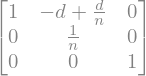

In [89]:
# entrance refracting surface
S1=T(-d,0)*Msnell(1,n)*T(d,0)
simplify(S1)

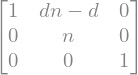

In [90]:
# exit refracting surface
S2 = T(-d,0)*Msnell(n,1)*T(d,0)
S2

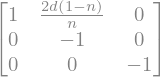

In [91]:
# Prism
Mrap = S2*Mra*S1
simplify(Mrap)

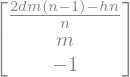

In [92]:
# outgoing ray
simplify(Mrap*ray(h,m))